<a href="https://colab.research.google.com/github/natty1973/Cholera-Analysis-worldwide/blob/master/Copy_of_petbd_final_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import requests as reqs
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os
import re
from pandas.io.json import json_normalize  
import ast
from google.colab import drive

In [ ]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
petdb_path = r"/content/drive/MyDrive/PetDB"
#print(os.listdir(petdb_path))

#for petdb in os.listdir(petdb_path):
    #print(petdb)

In [ ]:
files = []
pet_path = r'/content/drive/MyDrive/PetDB'
for i in os.listdir(pet_path):
    if i.endswith('.json'):
        full_path = '%s/%s' % (pet_path, i)
        jsonStr = open(full_path, 'r', encoding='utf-8').read()
        jsonStr = jsonStr.replace("'",'"')
        jsonStr = jsonStr.replace('None','"None"')
        try:
            jsonData = json.loads(jsonStr)
            files.append(jsonData)
        except Exception as e:
            print(e)
            continue

Expecting ',' delimiter: line 1 column 294 (char 293)


In [ ]:

df1= pd.DataFrame.from_dict(json_normalize(files[0]['data']), orient='columns')
i = 1
#while i < len(files):
while i < 300:
    df2 = pd.DataFrame.from_dict(json_normalize(files[i]['data']), orient='columns')
    df1 = df1.append(df2)
    i = i + 1
pd.set_option("display.max_columns", 29)
#df1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:

columns = ['specimen_num','citation_num', 'citation_code','specimen_code','igsn','archive_institution','specimen_material','taxon','taxon_rock_type', 'taxon_rock_class','rock_class_detail','rock_class_details','specimen_names','specimen_name','specimen_comments','specimen_comment','alteration','alterations','rock_textures','rock_texture','geological_ages','geological_ages__prefix','geological_ages__age','geological_ages__min','geological_ages__max','points_latitude','points_longitude','points_text','station_num', 'station_code','lat_label', 'long_label','points','centerLat','centerLong', 'elevation_min','elevation_max','location_precisions','geographic_location','tectonic_settings','expedition_num','expedition_code','sampling_technique_code','sampling_technique_name','analyzed_samples']
new_df = pd.DataFrame(data = None, index=None, columns = columns)
for index, row in df1.iterrows():
    citation_num_list = []
    citation_code_list = []
    specimen_num = row['specimen_num']
    specimen_code = row['specimen_code']
    igsn = row['igsn']
    archive_institution = row['archive_institution']
    specimen_material = row['specimen_material']
    taxon = row['taxon'] 
    rock_class_details = row['rock_class_details']
    from math import isnan
    check1 = type(rock_class_details)==list and len(rock_class_details)==0
    check2 = type(rock_class_details)==float and isnan(rock_class_details)
    if check1 or check2:
      rock_class_details = None

    
    specimen_names = row['specimen_names'] 

    specimen_comments = row['specimen_comments']
    check1 = type(specimen_comments)==list and len(specimen_comments)==0
    check2 = type(specimen_comments)==float and isnan(specimen_comments)
    if check1 or check2:
      specimen_comments = None 
    alterations = row['alterations']
    check1 = type(alterations)==list and len(alterations)==0
    check2 = type(alterations)==float and isnan(alterations)
    if check1 or check2:
      alterations = None 
    
    rock_textures = row['rock_textures'] 
    geological_ages = row['geological_ages'] 
    station_num = row['station_num']
    station_code = row['station_code']
    lat_label = row['lat_label']
    long_label = row['long_label']
    points = row['points'] 
    latitude = ''
    longitude = ''

    text = ''

    check1 = type(points)==list and len(points) > 0
    if check1:
    #if len(points)> 0:
      latitude = points[0]['latitude']
      longitude = points[0]['longitude']
    
    check1 = type(points)==list
    if check1:
      text = points[0]['text']
    centerLat = row['centerLat']
    centerLong = row['centerLong']
    elevation_min = row['elevation_min']
    elevation_max = row['elevation_max']
    location_precisions = row['location_precisions']
    geographic_location = row['geographic_location']
    tectonic_settings = row['tectonic_settings']
    expedition_num = row['expedition_num']
    expedition_code = row['expedition_code']
    sampling_technique_code = row['sampling_technique_code']
    sampling_technique_name = row['sampling_technique_name']
    analyzed_samples = row['analyzed_samples']
    taxon_rock_type = "None"
    taxon_rock_class = "None"
    check1 = type(taxon)==list and len(taxon) > 0
    if check1:
	    taxon_rock_type = taxon[0]['rock_type']
	    taxon_rock_class = taxon[0]['rock_class']
    

    geological_prefix = 'None'
    geological_ages__age = 'None'
    geological_ages__min = 'None'
    geological_ages__max = 'None'

    check1 = type(geological_ages)==list and len(geological_ages) > 0
    if check1:
        geological_prefix = geological_ages[0]['prefix']
        geological_ages__age = geological_ages[0]['age']
        geological_ages__min = geological_ages[0]['age_min']
        geological_ages__max = geological_ages[0]['age_max']

    
    rock_texture = 'None'
    if type(rock_textures)==list:
      for item in rock_textures:
        rock_texture = item['rock_texture']
    
    rock_class_detail = None
    if rock_class_details != None:
      item1 = rock_class_details[0]
      if item1 != None:
  	    rock_class_detail = item1['rock_class_detail']
    
    #rock_class_detail = 'None'
    #if rock_class_details != "None":
        #rock_class_detail = rock_class_details[0]['rock_class_detail']
    #check1 = type(alterations)==list and len(alterations)>0
    #check2 = type(alterations)==float and isnan(alterations)
    #if check1:
      #alterations = None 
    
    alteration = None
    if alterations != None:
        alteration = alterations[0]['alteration']
    
   
    specimen_comment = None
    if specimen_comments != None:
        specimen_comment = specimen_comments[0]['comment']
    
       
    
    specimen_names_list = [] 
    if type(specimen_names) == list:
      for item in specimen_names:
          specimen_name = item['specimen_name']
          specimen_names_list.append(specimen_name)

    if type(taxon)== list:
      for item in taxon:
        for source in item['source']:
            citation_num = source['citation_num']
            citation_code = source['citation_code']
            citation_num_list.append(citation_num)
            citation_code_list.append(citation_code)
    
    #print(specimen_names_list)
    
    i = 0
    while i < len(citation_num_list): #
        new_row = [] 
        citation_num = citation_num_list[i]
        citation_code = citation_code_list[i]
        
        #print('citation_num', citation_num)
        #print('citation_code', citation_code)
        #print(i)
        
        specimen_name = ""
        if i < len(specimen_names_list):
            specimen_name = specimen_names_list[i]
        #print(specimen_name)
        
        new_row.append(specimen_num)   
        new_row.append(citation_num) 
        new_row.append(citation_code) 
        new_row.append(specimen_code)
        new_row.append(igsn)
        new_row.append(archive_institution)
        new_row.append(specimen_material)
        new_row.append(taxon)
        new_row.append(taxon_rock_type)
        new_row.append(taxon_rock_class)
        new_row.append(rock_class_detail)
        new_row.append(rock_class_details)
        new_row.append(specimen_names)
        new_row.append(specimen_name)
        new_row.append(specimen_comments)
        new_row.append(specimen_comment)
        new_row.append(alteration)
        new_row.append(alterations)
        new_row.append(rock_textures)
        new_row.append(rock_texture)
        new_row.append(geological_ages)
        new_row.append(geological_prefix)
        new_row.append( geological_ages__age)
        new_row.append( geological_ages__min)
        new_row.append(geological_ages__max)
        new_row.append(latitude)
        new_row.append(longitude)
        new_row.append(text)
        new_row.append(station_num)
        new_row.append(station_code)
        new_row.append(lat_label)
        new_row.append(long_label)
        new_row.append(points)
        new_row.append(centerLat)
        new_row.append(centerLong)
        new_row.append(elevation_min)
        new_row.append(elevation_max)
        new_row.append(location_precisions)
        new_row.append(geographic_location)
        new_row.append(tectonic_settings)
        new_row.append(expedition_num)
        new_row.append(expedition_code)
        new_row.append(sampling_technique_code)
        new_row.append(sampling_technique_name)
        new_row.append(analyzed_samples)
        
        
        a_series = pd.Series(new_row, index=new_df.columns) # 
        new_df = new_df.append(a_series, ignore_index=True) 
        i += 1       

        pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
#pd.set_option('display.max_rows', None)
new_df.drop('taxon', axis = 1, inplace = True)
new_df.drop('specimen_names', axis = 1, inplace = True)
new_df.drop('rock_textures', axis = 1, inplace = True)
new_df.drop('geological_ages', axis = 1, inplace = True)
new_df.drop('points', axis = 1, inplace = True)
new_df.drop('rock_class_details', axis = 1, inplace = True)
new_df.drop('alterations', axis = 1, inplace = True)
new_df.drop('specimen_comments', axis = 1, inplace = True)

new_df['geographic_location'] = new_df['geographic_location'].apply(lambda x: ', '.join(map(str, x))) # convert list to strings
new_df['tectonic_settings'] = new_df['tectonic_settings'].apply(lambda x: ', '.join(map(str, x)))
new_df['location_precisions'] = new_df['location_precisions'].apply(lambda x: ', '.join(map(str, x)))
new_df['analyzed_samples'] = new_df['analyzed_samples'].apply(lambda x: ', '.join(map(str, x)))
#new_df['specimen_name'] = new_df['specimen_name'].apply(lambda x: ', '.join(map(str, x)))

new_df = new_df.replace('', 'None')
new_df = new_df.replace('N/A', 'None')
new_df = new_df.rename(columns = {'alteration' : 'alterations', 'rock_class_detail' : 'rock_class_details', 'specimen_comment' : 'specimen_comments'})
pd.set_option('display.max_rows', None)
#new_df.head()


In [ ]:
new_df = new_df.rename(columns = {'alteration' : 'alterations', 'rock_class_detail' : 'rock_class_details'})
#new_df

In [ ]:
new_df_final = new_df.drop(columns = ['alterations', 'analyzed_samples', 'archive_institution', 'citation_code', 'geological_ages__prefix', 'geological_ages__age', 'geological_ages__min', 'geological_ages__max','igsn','lat_label','long_label','location_precisions', 'rock_texture', 'specimen_comments'])
#new_df_final

In [ ]:

new_df_final1 = new_df_final.drop(columns = ['sampling_technique_code', 'sampling_technique_name', 'specimen_material', 'centerLat', 'centerLong', 'points_text'])
#new_df_final1


In [ ]:
#%%timeit

def mycompare_specimen_num(row1val, row2val):
  return row1val==row2val
def mycompare_specimen_code(row1val, row2val):
  return row1val==row2val
def mycompare_taxon_rock_type(row1val, row2val):
  return row1val==row2val
def mycompare_taxon_rock_class(row1val, row2val):
  return row1val==row2val
def mycompare_rock_class_details(row1val, row2val):
  return row1val==row2val
def mycompare_specimen_name(row1val, row2val):
  return row1val==row2val
def mycompare_points_latitude(row1val, row2val):
  return row1val==row2val
def mycompare_points_longitude(row1val, row2val):
  return row1val==row2val
def mycompare_station_num(row1val, row2val):
  return row1val==row2val
def mycompare_station_code(row1val, row2val):
  return row1val==row2val
def mycompare_elevation_min(row1val, row2val):
  return row1val==row2val
def mycompare_elevation_max(row1val, row2val):
  return row1val==row2val
def mycompare_geographic_location(row1val, row2val):
  return row1val==row2val
def mycompare_tectonic_settings(row1val, row2val):
  return row1val==row2val
def mycompare_expedition_num(row1val, row2val):
  return row1val==row2val
def mycompare_expedition_code(row1val, row2val):
  return row1val==row2val

def mycompare (row1, row2, column_name):
  #return row1[column_name] == row2[column_name]
  if column_name=="specimen_num":
      return mycompare_specimen_num( row1[column_name], row2[column_name] )
  elif column_name=="specimen_code":
      return mycompare_specimen_code( row1[column_name], row2[column_name] )
  elif column_name=="taxon_rock_type":
      return mycompare_taxon_rock_type( row1[column_name], row2[column_name] )
  elif column_name=='taxon_rock_class':
      return mycompare_taxon_rock_class( row1[column_name], row2[column_name] )
  elif column_name=='rock_class_details': 
      return mycompare_rock_class_details( row1[column_name], row2[column_name] )
  elif column_name=='specimen_name':
      return mycompare_specimen_name( row1[column_name], row2[column_name] )
  elif column_name=='points_latitude':
      return mycompare_points_latitude( row1[column_name], row2[column_name] )
  elif column_name=='points_longitude':
      return mycompare_points_longitude( row1[column_name], row2[column_name] )
  elif column_name=='station_num':
      return mycompare_station_num( row1[column_name], row2[column_name] )
  elif column_name=='station_code':
      return mycompare_station_code( row1[column_name], row2[column_name] )
  elif column_name=='elevation_min':
      return mycompare_elevation_min( row1[column_name], row2[column_name] )
  elif column_name=='elevation_max':
      return mycompare_elevation_max( row1[column_name], row2[column_name] )
  elif column_name=='geographic_location': 
      return mycompare_geographic_location( row1[column_name], row2[column_name] )
  elif column_name=='tectonic_settings':
      return mycompare_tectonic_settings( row1[column_name], row2[column_name] )
  elif column_name=='expedition_num': 
      return mycompare_expedition_num( row1[column_name], row2[column_name] )
  elif column_name=='expedition_code':
      return mycompare_expedition_code( row1[column_name], row2[column_name] )
  else:
      return False
      
#mycompare(new_df_final1.loc[0], new_df_final1.loc[1], 'specimen_num')
#print(len(new_df_final1))

In [ ]:
# def getsimilarities (df, column_name):
#     i = 0
#     results = []
#     while i < len(df) - 1:
#         j = i + 1
#         row1 = df.loc[i]
#         my_results = []
#         while j < len(df):
#             row2 = df.loc[j]
#             result = mycompare(row1, row2, column_name)
#             package = [i,j,result]
#             my_results.append(package)
            
#             j += 1
#         i += 1
#         results.append(my_results)
#     return results
            
            

In [ ]:
#columns = ['citation_num', 'specimen_code', 'taxon_rock_type', 'taxon_rock_class','rock_class_details','specimen_name','points_latitude','points_longitude','station_num', 'station_code','elevation_min','elevation_max','geographic_location','tectonic_settings','expedition_num','expedition_code']
def count_similar_columns(row1, row2):
    columns = ['citation_num','taxon_rock_type', 'taxon_rock_class','rock_class_details','specimen_name','points_latitude','points_longitude','elevation_min','elevation_max','geographic_location','tectonic_settings','expedition_num']
    count = 0
    for column in columns:
      result = mycompare(row1, row2, column)
      if result:
        count+=1
    return count

def compare_two_rows(row1, row2):
    rv = False
    row1_specimen_num = row1['specimen_num'] 
    row2_specimen_num = row2['specimen_num']
    if row1_specimen_num != row2_specimen_num:
      return False
    
# count the number of similar attributes between these two rows
    
    threshold = 0.50
    count = count_similar_columns(row1, row2)
    if float( count/len(columns)) >= threshold:
      rv = True
    return rv


def get_similarities_2(df):
  i = 0
  results = []
  while i < len(df)-1:
    row1 = df.loc[i]
    j = i
    while j < len(df):
      row2 = df.loc[j]
      result = compare_two_rows(row1, row2)
      result_list = [ i, j, result ]
      if i != j:
         results.append(result_list)
      j+=1
    i+=1
  return results


columns = ['specimen_num', 'citation_num', 'specimen_code', 'taxon_rock_type', 'taxon_rock_class','rock_class_details','specimen_name','points_latitude','points_longitude','station_num', 'station_code','elevation_min','elevation_max','geographic_location','tectonic_settings','expedition_num','expedition_code']
columns2 = ['row1','row2','result']

similarities_list = get_similarities_2( new_df_final1 )

similar_df = pd.DataFrame(data = None, index=None, columns = columns2)

for sublist in similarities_list:
  aseries = pd.Series(sublist, index=similar_df.columns)
  similar_df = similar_df.append(aseries, ignore_index=True)
  
#similar_df



In [ ]:
%timeit similar_df

100000000 loops, best of 3: 19.3 ns per loop


In [ ]:

columns = ['specimen_num', 'citation_num', 'taxon_rock_type', 'taxon_rock_class','rock_class_details','specimen_name','points_latitude','points_longitude','elevation_min','elevation_max','geographic_location','tectonic_settings','expedition_num']
double_columns = []

j = 0
while j < 2:
    i = 0
    while i < len(columns):
        double_columns.append(columns[i]) 
        i += 1
    j += 1    
double_columns.append("results")
doubledf = pd.DataFrame(data = None, index=None, columns = double_columns)


In [ ]:


for index,row in similar_df.iterrows():
  
  # given the values of row1 and row2
  row1index = row['row1']
  row2index = row['row2']
  val = row['result']
  
  # get the row in new_final_df corresponding to each index
  row1 = new_df_final1.iloc[row1index]
  row2 = new_df_final1.iloc[row2index]
  
  # construct a list of values for each row
  row_list = []
  for key in columns:
      row_list.append( row1[key] )
  for key in columns:
      row_list.append( row2[key])
  row_list.append( val )
    
  # insert row_list into the new dataframe
  aSeries = pd.Series(row_list, index=doubledf.columns)
  doubledf = doubledf.append( aSeries, ignore_index=True )

#doubledf.head()




I converted the similar_df into a "double_df" which represents each row compared to each other row of our initial dataframe (new_df_final1) in a single row.
The similar_df was constructed as a high-level visual of each row comparison and result.
The double_df is an expanded-version of similar_df with all of the columns aggregated.
Each row of new_df_final1 is compared with each other row (unique comparisons, no duplicates).



In [ ]:
#doubledf.shape
doubledf.drop('specimen_num',axis=1,inplace=True)
doubledf.columns = ['citation_num_0','taxon_rock_type_0', 'taxon_rock_class_0', 'rock_class_details_0', 'specimen_name_0', 'points_latitude_0', 'points_longitude_0', 'elevation_min_0', 'elevation_max_0', 'geographic_location_0','tectonic_settings_0', 'expedition_num_0', 'citation_num_1', 'taxon_rock_type_1','taxon_rock_class_1', 'rock_class_details_1','specimen_name_1','points_latitude_1', 'points_longitude_1', 'elevation_min_1', 'elevation_max_1', 'geographic_location_1','tectonic_settings_1', 'expedition_num_1','results']

doubledf.head()

,citation_num_0,taxon_rock_type_0,taxon_rock_class_0,rock_class_details_0,specimen_name_0,points_latitude_0,points_longitude_0,elevation_min_0,elevation_max_0,geographic_location_0,tectonic_settings_0,expedition_num_0,citation_num_1,taxon_rock_type_1,taxon_rock_class_1,rock_class_details_1,specimen_name_1,points_latitude_1,points_longitude_1,elevation_min_1,elevation_max_1,geographic_location_1,tectonic_settings_1,expedition_num_1,results
0,1086,igneous:volcanic:mafic,BASALT,None,VG10101,31.145,-41.205,-3180,-3220,"OCEAN|ATLANTIC, SPREADING_CENTER|MID-ATLANTIC RIDGE",FRACTURE_ZONE,2,1086,igneous:volcanic:mafic,BASALT,None,VG10102,31.145,-41.205,-3180,-3220,"OCEAN|ATLANTIC, SPREADING_CENTER|MID-ATLANTIC RIDGE",FRACTURE_ZONE,2,False
1,1086,igneous:volcanic:mafic,BASALT,None,VG10101,31.145,-41.205,-3180,-3220,"OCEAN|ATLANTIC, SPREADING_CENTER|MID-ATLANTIC RIDGE",FRACTURE_ZONE,2,1086,igneous:volcanic:mafic,BASALT,None,VG10103,31.129,-41.296,-3279,-3400,"SPREADING_CENTER|MID-ATLANTIC RIDGE, OCEAN|ATLANTIC",FRACTURE_ZONE,2,False
2,1086,igneous:volcanic:mafic,BASALT,None,VG10101,31.145,-41.205,-3180,-3220,"OCEAN|ATLANTIC, SPREADING_CENTER|MID-ATLANTIC RIDGE",FRACTURE_ZONE,2,1086,igneous:volcanic:mafic,BASALT,None,VG10104,31.129,-41.296,-3279,-3400,"SPREADING_CENTER|MID-ATLANTIC RIDGE, OCEAN|ATLANTIC",FRACTURE_ZONE,2,False
3,1086,igneous:volcanic:mafic,BASALT,None,VG10101,31.145,-41.205,-3180,-3220,"OCEAN|ATLANTIC, SPREADING_CENTER|MID-ATLANTIC RIDGE",FRACTURE_ZONE,2,1086,igneous:volcanic:mafic,BASALT,None,VG10105,31.129,-41.296,-3279,-3400,"SPREADING_CENTER|MID-ATLANTIC RIDGE, OCEAN|ATLANTIC",FRACTURE_ZONE,2,False
4,1086,igneous:volcanic:mafic,BASALT,None,VG10101,31.145,-41.205,-3180,-3220,"OCEAN|ATLANTIC, SPREADING_CENTER|MID-ATLANTIC RIDGE",FRACTURE_ZONE,2,1086,igneous:volcanic:mafic,BASALT,None,VG10106,30.392,-41.618,-2990,-3250,"OCEAN|ATLANTIC, SPREADING_CENTER|MID-ATLANTIC RIDGE",SPREADING_CENTER,2,False


In [ ]:
uni1 = doubledf['results'].value_counts()
uni1

False    98585
True       205
Name: results, dtype: int64

In [ ]:

doubledf1 = pd.get_dummies(doubledf)
#doubledf1

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = doubledf1[doubledf1.results_True==0]
df_minority = doubledf1[doubledf1.results_True==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority), # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.results_True.value_counts()

1    205
0    205
Name: results_True, dtype: int64

In [ ]:
#petDB_final = under_sample_indices.values

petDB_final = df_downsampled.values
X = petDB_final[:,:-2]
Y = petDB_final[:,-1]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, make_scorer
from sklearn import svm


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.3, random_state=0, stratify = Y)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((287, 1665), (287,), (123, 1665), (123,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_pred)
#score_knn = knn.score(X_test,Y_test)
#print('The accuracy of the KNN Model is %0.3f)' % score_knn)
print('The accuracy_score for KNN model is %0.3f\n' % knn_accuracy)
print(classification_report(Y_test, knn_pred))


The accuracy_score for KNN model is 0.805

              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80        62
         1.0       0.78      0.84      0.81        61

    accuracy                           0.80       123
   macro avg       0.81      0.81      0.80       123
weighted avg       0.81      0.80      0.80       123



In [ ]:
# cross_validation method
scores_knn = cross_val_score(knn, X_train, Y_train, cv=5)
mean_knn = scores_knn.mean()
print('The Cross_validation_score for KNN model is %0.3f' % mean_knn)

The Cross_validation_score for KNN model is 0.881


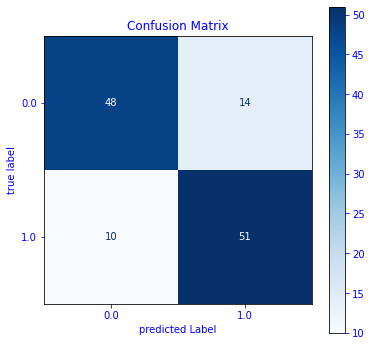

In [ ]:
from sklearn.metrics import plot_confusion_matrix

matrix_knn = plot_confusion_matrix(knn, X_test, Y_test, cmap=plt.cm.Blues)
matrix_knn.ax_.set_title('Confusion Matrix', color='blue')
plt.xlabel('predicted Label', color ='blue')
plt.ylabel('true label', color ='blue')
plt.gcf().axes[0].tick_params(colors='blue')
plt.gcf().axes[1].tick_params(colors='blue')
plt.gcf().set_size_inches(6,6)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_pred = log_reg.predict(X_test)
log_accuracy = accuracy_score(Y_test, log_pred)
print('The accuracy_score of the Logistic Regression model is %0.3f\n' % log_accuracy)
print(classification_report(Y_test, log_pred))

The accuracy_score of the Logistic Regression model is 0.837

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84        62
         1.0       0.83      0.85      0.84        61

    accuracy                           0.84       123
   macro avg       0.84      0.84      0.84       123
weighted avg       0.84      0.84      0.84       123



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(np.unique(log_pred))

[0. 1.]


In [ ]:
#cross_validation method

scores_logreg = cross_val_score(log_reg, X_train, Y_train, cv=5)
mean_logreg = scores_logreg.mean()
print('The Cross_validation score is %0.3f'% mean_logreg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The Cross_validation score is 0.868


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


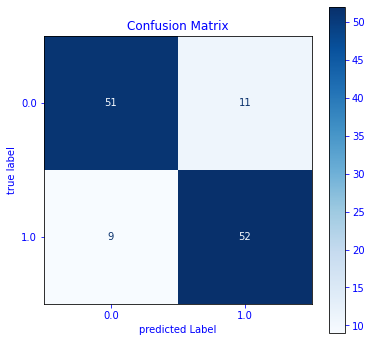

In [ ]:
from sklearn.metrics import plot_confusion_matrix
matrix_logreg = plot_confusion_matrix(log_reg, X_test, Y_test, cmap=plt.cm.Blues)
matrix_logreg.ax_.set_title('Confusion Matrix', color='blue')
plt.xlabel('predicted Label', color ='blue')
plt.ylabel('true label', color ='blue')
plt.gcf().axes[0].tick_params(colors='blue')
plt.gcf().axes[1].tick_params(colors='blue')
plt.gcf().set_size_inches(6,6)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
DTC_pred = DTC.predict(X_test)
#score_DTC = DTC.score(X_test, Y_test)
#print('The accuracy of the DTC Model is',score_DTC)
DTC_accuracy = accuracy_score(Y_test, DTC_pred)
#print('The accuracy_score for the Decision Tree model is %0.3f\n' % DTC_accuracy)
print(classification_report(Y_test, DTC_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89        62
         1.0       0.87      0.90      0.89        61

    accuracy                           0.89       123
   macro avg       0.89      0.89      0.89       123
weighted avg       0.89      0.89      0.89       123



In [ ]:
#cross_validation method
scores_DTC = cross_val_score(DTC, X_train, Y_train, cv=5)
mean_DTC = scores_DTC.mean()
print('The cross_validation_score for the Decision tree model is %0.3f' % mean_DTC)


The cross_validation_score for the Decision tree model is 0.843


In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
#score_svc = svc.score(X_test, Y_test)
#print('The accuracy of the SVC Model is %0.3f)' % score_svc)
svc_accuracy = accuracy_score(Y_test, svc_pred)
print('The accuracy_score of the SVC model is %0.3f\n' % svc_accuracy )
print(classification_report(Y_test, svc_pred))

The accuracy_score of the SVC model is 0.585

              precision    recall  f1-score   support

         0.0       0.67      0.35      0.46        62
         1.0       0.56      0.82      0.66        61

    accuracy                           0.59       123
   macro avg       0.61      0.59      0.56       123
weighted avg       0.61      0.59      0.56       123



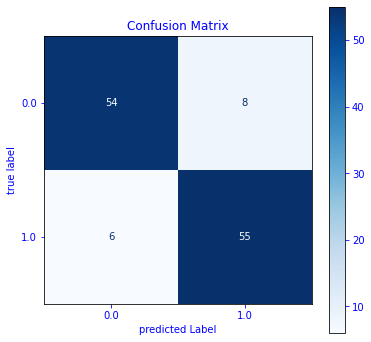

In [ ]:
matrix_DTC = plot_confusion_matrix(DTC, X_test, Y_test, cmap=plt.cm.Blues)
matrix_DTC.ax_.set_title('Confusion Matrix', color='blue')
plt.xlabel('predicted Label', color ='blue')
plt.ylabel('true label', color ='blue')
plt.gcf().axes[0].tick_params(colors='blue')
plt.gcf().axes[1].tick_params(colors='blue')
plt.gcf().set_size_inches(6,6)
plt.show()

In [ ]:
#cross_validation method

scores_svc = cross_val_score(svc, X_train, Y_train, cv=5)
mean_svc = scores_svc.mean()
print('The Cross_validation_score for the SVC model is %0.3f' % mean_svc)

The Cross_validation_score for the SVC model is 0.669


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
rfr_pred = rfr.predict(X_test)
score_rfr = rfr.score(X_test, Y_test)
print('The accuracy of the Random Forest model is %0.3f' % score_rfr)
#print('The accuracy_score of the Random Forest model is %0.3f' % accuracy_score(Y_test, rfr_pred))

The accuracy of the Random Forest model is 0.619


In [ ]:
scores_rfr = cross_val_score(rfr, X_train, Y_train, cv=5)
mean_rfr = scores_rfr.mean()
print('The Cross_validation_score is %0.3f' % mean_rfr)

The Cross_validation_score is 0.568


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(Y_test, gnb_pred)
#score_gnb = gnb.score(X_test, Y_test)
#print('The accuracy of the GNB Model is %0.3f)' % score_gnb)
#print('The accuracy_score of the Naive Bayes model is %0.3f\n' % gnb_accuracy)
print(classification_report(Y_test, gnb_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71        62
         1.0       0.70      0.75      0.72        61

    accuracy                           0.72       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.72      0.72      0.72       123



In [ ]:
scores_gnb = cross_val_score(gnb, X_train, Y_train, cv=5)
mean_gnb = scores_gnb.mean()
print('The Cross_validation_score for the Guassian Naive Bayes is %0.3f' % mean_gnb)

The Cross_validation_score for the Guassian Naive Bayes is 0.756


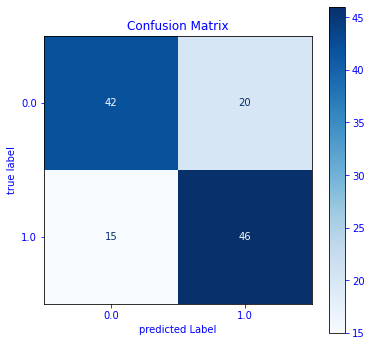

In [ ]:
matrix_knn = plot_confusion_matrix(gnb, X_test, Y_test, cmap=plt.cm.Blues)
matrix_knn.ax_.set_title('Confusion Matrix', color='blue')
plt.xlabel('predicted Label', color ='blue')
plt.ylabel('true label', color ='blue')
plt.gcf().axes[0].tick_params(colors='blue')
plt.gcf().axes[1].tick_params(colors='blue')
plt.gcf().set_size_inches(6,6)
plt.show()

In [ ]:
print('%0.3f' % log_accuracy, '%0.3f' % knn_accuracy, '%0.3f' % DTC_accuracy, '%0.3f' % svc_accuracy, '%0.3f' % score_rfr, '%0.3f' % gnb_accuracy)

0.837 0.805 0.886 0.585 0.619 0.715


In [ ]:
print('%0.3f' % mean_logreg, '%0.3f' % mean_knn, '%0.3f' % mean_DTC, '%0.3f' % mean_svc, '%0.3f' % mean_rfr, '%0.3f' % mean_gnb)

0.868 0.881 0.843 0.669 0.568 0.756


In [ ]:
#prediction probabilities(predict_proba)

r_probs = [0 for _ in range(len(Y_test))] # 0 - worse case scenario
log_reg_probs = log_reg.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
DTC_probs = DTC.predict_proba(X_test)
gnb_probs =gnb.predict_proba(X_test)


In [ ]:
#probabilities for positive outcomes
log_reg_probs = log_reg_probs[:, 1]
knn_probs = knn_probs[:,1]
DTC_probs = DTC_probs[:,1]
gnb_probs = gnb_probs[:,1]

In [ ]:
#computing AUROC (area under the roc curve) and ROC values
from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(Y_test, r_probs)
log_reg_auc = roc_auc_score(Y_test, log_reg_probs)
knn_auc = roc_auc_score(Y_test, knn_probs)
DTC_auc = roc_auc_score(Y_test, DTC_probs)
gnb_auc = roc_auc_score(Y_test, gnb_probs)

In [ ]:
#print AUROC (area under the roc curve) score for all the models


print('random (chance) Prediction: AUROC = %.3f' %(r_auc)) #worst case scenario
print('LogisticRegression:AUROC = %.3f' %(log_reg_auc))
print('KNN :AUROC = %.3f' %(knn_auc))
print('DecisionTree :AUROC = %.3f' %(DTC_auc))
print('Naive Bayes :AUROC = %.3f' %(gnb_auc))

random (chance) Prediction: AUROC = 0.500
LogisticRegression:AUROC = 0.936
KNN :AUROC = 0.914
DecisionTree :AUROC = 0.886
Naive Bayes :AUROC = 0.716


In [ ]:
#calculate ROC curve (fpr-false positive rate, tpr-true positive rate) for all the models

r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
log_reg_fpr, log_reg_tpr, _ = roc_curve(Y_test, log_reg_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)
DTC_fpr, DTC_tpr, _ = roc_curve(Y_test, DTC_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(Y_test, gnb_probs)


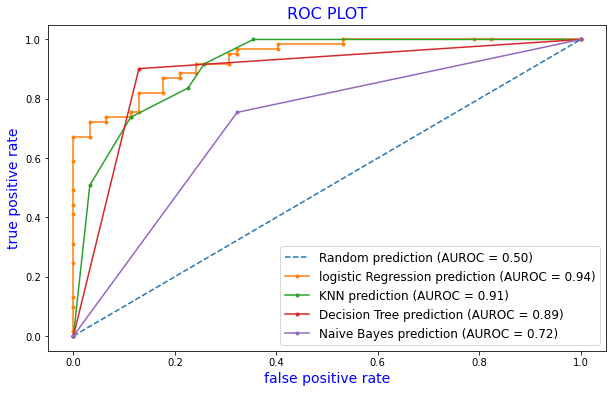

In [ ]:
#plot roc curve

plt.plot(r_fpr, r_tpr, linestyle='--', label ='Random prediction (AUROC = %0.2f)' % r_auc)
plt.plot(log_reg_fpr, log_reg_tpr, marker ='.', label ='logistic Regression prediction (AUROC = %0.2f)' % log_reg_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label ='KNN prediction (AUROC = %0.2f)' % knn_auc)
plt.plot(DTC_fpr, DTC_tpr, marker='.', label ='Decision Tree prediction (AUROC = %0.2f)' % DTC_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label ='Naive Bayes prediction (AUROC = %0.2f)' % gnb_auc)

plt.title('ROC PLOT', fontsize = 16, color = 'blue')
plt.xlabel('false positive rate', fontsize = 14, color = 'blue')
plt.ylabel('true positive rate', fontsize = 14, color = 'blue')
plt.legend(fontsize = 12)
plt.gcf().set_size_inches(10,6)
plt.show()


